## 0. Import stuff

#### Libraries

In [50]:
# -*- coding: utf-8 -*-
%matplotlib inline
import os
from ena import text_preprocessing as tp, ena_processing as ep, ena_viz as ev
import numpy as np
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt, mpld3
#mpld3.enable_notebook()
#import matplotlib.pylab as pylab
import pickle
import pandas as pd

#### Paths

In [2]:
root_path = 'C:\Users\CATALINA ESPINOZA\Documents\clusters ciae'
data_path = os.path.join(root_path,'data')
output_path = os.path.join(root_path,'output')
pickle_path = os.path.join(output_path,'pickles')
by_grade_path = os.path.join(output_path,'textos_ulloa_by_curso')
by_grade_and_content = os.path.join(data_path,'textos_ulloa_by_grade_content')
by_content_path = os.path.join(output_path,'textos_ulloa_by_contenido')
all_files_path = os.path.join(data_path,'textos_ulloa')
all_classes = os.path.join(data_path,'clases_ulloa.txt')

## 1. Preprocessing

### Defining preprocessing variables

In [3]:
FILTER_BY_LENGTH = True
MIN_LENGTH = 20 # minutes

COPY_WITH_LOSS = False
LOST_WORDS = 10 # percentage

SPLIT_DOCUMENTS_IN_PERIODS = True
PERIOD_LENGTH = 5 # minutss
OVERLAP_LENGTH = 4 # minutes

USE_DIAGONAL = False

In [4]:
stop_words_spanish = stopwords.words('spanish')

### Get sesions and info related

In [5]:
all_documents_dict = tp.read_documents(all_files_path)

In [6]:
with open(os.path.join(output_path,'pickles','document_length_dict.pickle'),'rb') as f:
    document_length = pickle.load(f)

In [7]:
with open(os.path.join(output_path,'pickles','label_per_audio.pickle'),'rb') as f:
    labels_per_audio = pickle.load(f)

In [8]:
names_docs = all_documents_dict.keys()

### Filter session documents

In [9]:
if FILTER_BY_LENGTH:
    filtered_documents = tp.filter_by_duration(document_length,all_documents_dict,MIN_LENGTH)
else:
    filtered_documents = all_documents_dict

### Split documents

In [10]:
if SPLIT_DOCUMENTS_IN_PERIODS:
    splitted_documents,splitted_labels = tp.split_documents(filtered_documents,labels_per_audio,PERIOD_LENGTH,OVERLAP_LENGTH)
    splitted_by_session,labels_by_session = tp.get_labels_and_splitted_documents_by_session(filtered_documents,labels_per_audio,PERIOD_LENGTH,OVERLAP_LENGTH)
else:
    splitted_documents = filtered_documents
    splitted_labels = labels_per_audio
    splitted_by_session,labels_by_session = tp.get_labels_and_splitted_documents_by_session(filtered_documents,labels_per_audio,1000000,0)

In [11]:
n_lineas = len(filtered_documents['1496173972733'].splitlines())
n_lineas_minutes = int((PERIOD_LENGTH*60)/5)# n lineas of a number of minutes
n_lineas_overlap = int((OVERLAP_LENGTH*60/5))
print n_lineas
print n_lineas_minutes
print n_lineas_overlap

361
60
48


In [12]:
361*5/60.0

30.083333333333332

In [13]:
reload(tp)

<module 'ena.text_preprocessing' from 'ena\text_preprocessing.pyc'>

In [14]:
print n_lineas
print n_lineas_overlap
print n_lineas_minutes

361
48
60


In [15]:
n_lineas

361

In [16]:
iteration = 0
i = 0
j = 0
while j<(n_lineas-(n_lineas_minutes-n_lineas_overlap)):
    i = iteration *(n_lineas_minutes-n_lineas_overlap)
    j = i + n_lineas_minutes
    #last_i = (iteration-1) *(n_lineas_minutes-n_lineas_overlap)
    #print str(i-last_i)
    print str(i) +", "+str(j)
    #print str(j-i)
    print iteration
    print "**"
    iteration += 1
print iteration

0, 60
0
**
12, 72
1
**
24, 84
2
**
36, 96
3
**
48, 108
4
**
60, 120
5
**
72, 132
6
**
84, 144
7
**
96, 156
8
**
108, 168
9
**
120, 180
10
**
132, 192
11
**
144, 204
12
**
156, 216
13
**
168, 228
14
**
180, 240
15
**
192, 252
16
**
204, 264
17
**
216, 276
18
**
228, 288
19
**
240, 300
20
**
252, 312
21
**
264, 324
22
**
276, 336
23
**
288, 348
24
**
300, 360
25
**
26


In [17]:
360-n_lineas_overlap

312

In [18]:
n_sessions = len(splitted_documents)
print n_sessions

2425


### Filter parts of documents

In [19]:
if COPY_WITH_LOSS:
    pass
else:
    pass

### Summary

In [20]:
documents = splitted_documents
labels = splitted_labels

In [21]:
len(documents)

2425

## 2. Get topics

In [22]:
with open(os.path.join(pickle_path,'clean_topics_english.pickle'),'rb') as f:
    topic_names = pickle.load(f)
    topic_score = pickle.load(f)
    topic_words = pickle.load(f)

In [23]:
for i in range(len(topic_score)):
    assert len(topic_score[i])==len(topic_words[i])

In [24]:
with open(os.path.join(pickle_path,'topics_heber_sessions.pickle'),'rb') as f:
    dict_words_topics_index = pickle.load(f)
    topic_vectors = pickle.load(f)
    sorted_index = pickle.load(f)

In [25]:
selected_topics = map(lambda x: topic_names[x],sorted_index[-16:]) # top 16 topics
selected_t_words = map(lambda x: topic_words[x],sorted_index[-16:]) # top 16 topics
selected_t_scores = map(lambda x: topic_score[x],sorted_index[-16:]) # top 16 topics
selected_t_scores = map(lambda l: map(lambda x: float(x.replace('.','').replace(',','.')),l),selected_t_scores)

In [26]:
len(sorted_index)

200

In [27]:
# clean_words,clean_scores = clean_selected_words(selected_t_words,selected_t_scores)
# Build a dictionary with the scores per topic per word
topic_score_word_dict = {}
for i in range(len(selected_topics)):
    for s,w in enumerate(selected_t_words[i]):
        score = selected_t_scores[i][s]
        a_vector = np.array([score if i==j else 0 for j in range(len(selected_topics))])
        if w in topic_score_word_dict:
            topic_score_word_dict[w] += a_vector
        else:
            topic_score_word_dict[w] = a_vector

In [28]:
selected_topics

['Kinematics',
 'Observe',
 'Time units',
 'Gas laws',
 'Electric-circuits',
 'Explain',
 'Solar system',
 'Electrostatics',
 'Compute',
 'Excercise',
 'Forms of energy',
 'Numbers',
 'Enquire',
 'Water resources',
 'Order',
 'Dynamics']

In [29]:
for i in zip(selected_topics,selected_t_words):
    print " "
    print i[0]+": "+", ".join(i[1])
    #print i
    print " "
    print "------------------------------------------------------------------------------------ "

 
Kinematics: rapidez, automóvi, velocida, direcció, roce, rueda, tiempo, mismo, puede, recorre, misma, máquinas, hace, depende, mueve, objeto, cae, asientos, pasajero
 
------------------------------------------------------------------------------------ 
 
Observe: ver, ventana, máxima, laborato, sombra, linterna, observar, salió, pastel, mínimos, rea, hilo, eclipse, oah, oaa, apoyo, observan, pequeños, revisar
 
------------------------------------------------------------------------------------ 
 
Time units: horas, hora, media, circular, tiempo, camino, coincide, día, mañana, contando, planilla, decir, tarde, muestra, DIGITide, conectad, duración, comienza, quiere, conecta
 
------------------------------------------------------------------------------------ 
 
Gas laws: presión, gas, atm, gases, temperat, contened, recipien, relación, DIGITtem, boyle, cerrado, comas, experime, presione, lussac, gay, prendas, introduj
 
--------------------------------------------------------------

In [30]:
len(selected_topics)
np.zeros((len(selected_topics),1)).shape

(16L, 1L)

#### Functions

## 3. Get ENA's edges

#### Get co-occurrence matrices per document

In [31]:
co_ocurrence_matrices_all_corpus,labels_corpus = ep.get_co_occurrence_matrices(all_documents_dict,selected_t_words,selected_t_scores,topic_score_word_dict,5)

In [32]:
len(co_ocurrence_matrices_all_corpus)

56

In [33]:
co_ocurrence_matrices,labels_array_matrices = ep.get_co_occurrence_matrices(documents,selected_t_words,selected_t_scores,topic_score_word_dict,5)

In [34]:
len(co_ocurrence_matrices)

2425

### Get all co occurrences in the corpus

In [35]:
co_occurrence_matrix = ep.get_total_co_occurrence(co_ocurrence_matrices_all_corpus)

### Get super matrices

In [36]:
content_topics = [0,15,3,6,13,10,4,7]
science_skills_topics = [1,12,5,9]
science_tools_topics = [2,8,11,14]
groups_of_topics = [content_topics,science_skills_topics,science_tools_topics]

In [37]:
np.array(selected_topics)[content_topics]

array(['Kinematics', 'Dynamics', 'Gas laws', 'Solar system',
       'Water resources', 'Forms of energy', 'Electric-circuits',
       'Electrostatics'], dtype='|S17')

In [38]:
np.array(selected_topics)[science_skills_topics]

array(['Observe', 'Enquire', 'Explain', 'Excercise'], dtype='|S17')

In [39]:
np.array(selected_topics)[science_tools_topics]

array(['Time units', 'Compute', 'Numbers', 'Order'], dtype='|S17')

In [40]:
super_matrices_corpus = {}
for key in co_ocurrence_matrices_all_corpus.keys():
    super_matrices_corpus[key] = ep.get_aggregated_matrix(co_ocurrence_matrices_all_corpus[key],groups_of_topics)

In [41]:
df = pd.DataFrame(super_matrices_corpus.values()[0])
df.columns = ['content','science skills','math skills']
df.index = ['content','science skills','math skills']
df

,content,science skills,math skills
content,65.229484,97.384340,123.989700
science skills,0.000000,38.371748,100.687301
math skills,0.000000,0.000000,35.826501


In [42]:
super_vectors_corpus = {}
for key in super_matrices_corpus.keys():
    super_vectors_corpus[key] = np.array([super_matrices_corpus[key][0,1],super_matrices_corpus[key][0,2],super_matrices_corpus[key][1,2]])

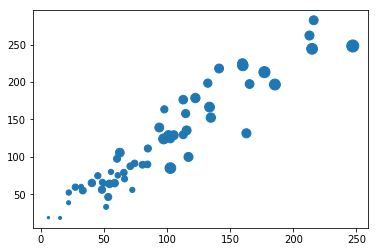

In [63]:
x_3d = []
y_3d = []
z_3d = []
las_labels = []
dict_by_level = {}
for key in  super_vectors_corpus.keys():
    l = labels_per_audio[key]
    a_level = str(l.split('th')[0])
    x_3d.append(super_vectors_corpus[key][0])
    y_3d.append(super_vectors_corpus[key][1])
    z_3d.append(super_vectors_corpus[key][2]) 
    las_labels.append(l)
    if not a_level in dict_by_level:
        dict_by_level[a_level] = {}
        dict_by_level[a_level]['label'] = []
        dict_by_level[a_level]['x'] = []
        dict_by_level[a_level]['y'] = []
        dict_by_level[a_level]['z'] = []
        dict_by_level[a_level]['color'] = []
    dict_by_level[a_level]['label'].append(l)
    dict_by_level[a_level]['x'].append(super_vectors_corpus[key][0])
    dict_by_level[a_level]['y'].append(super_vectors_corpus[key][1])
    dict_by_level[a_level]['z'].append(super_vectors_corpus[key][2])
    dict_by_level[a_level]['color'].append(colors[a_level])        
        
plt.scatter(x_3d, y_3d,z_3d)
plt.show()

In [47]:
plotly.tools.set_credentials_file(username='ceinaipil', api_key='VuZw9IO8oY2oOZVjR9UO')

NameError: name 'plotly' is not defined

In [216]:
levels = []
colors = {'12':'#DD2C00','11':'#FFD600','10':'#00C853','9':'#0091EA','8':'#6200EA','7':'#455A64'}
c_levels = []
for l in las_labels:
    a_level = l.split('th')[0]
    levels.append(a_level)
    c_levels.append(colors[str(a_level)])

In [209]:
import plotly
plotly.tools.set_credentials_file(username='catta.ugs', api_key='BGbZD5URMqON8tOnEmcK')
import plotly.plotly as py
import plotly.graph_objs as go

In [218]:
x_3d = []
y_3d = []
z_3d = []
las_labels = []
dict_by_level = {}
for key in  super_vectors_corpus.keys():
    l = labels_per_audio[key]
    a_level = str(l.split('th')[0])
    x_3d.append(super_vectors_corpus[key][0])
    y_3d.append(super_vectors_corpus[key][1])
    z_3d.append(super_vectors_corpus[key][2]) 
    las_labels.append(l)
    if not a_level in dict_by_level:
        dict_by_level[a_level] = {}
        dict_by_level[a_level]['label'] = []
        dict_by_level[a_level]['x'] = []
        dict_by_level[a_level]['y'] = []
        dict_by_level[a_level]['z'] = []
        dict_by_level[a_level]['color'] = []
    dict_by_level[a_level]['label'].append(l)
    dict_by_level[a_level]['x'].append(round(super_vectors_corpus[key][0],2))
    dict_by_level[a_level]['y'].append(round(super_vectors_corpus[key][1],2))
    dict_by_level[a_level]['z'].append(round(super_vectors_corpus[key][2],2))
    dict_by_level[a_level]['color'].append(colors[a_level])        

In [219]:
data = []
for i in range(6):
    a_trace = go.Scatter3d(
    x = dict_by_level[str(i+7)]['x'],
    y = dict_by_level[str(i+7)]['y'],
    z = dict_by_level[str(i+7)]['z'],
    text = dict_by_level[str(i+7)]['label'],
    name = str(i+7)+'th grade',
    mode='markers',
    marker=dict(
        size=12,
        color= dict_by_level[str(i+7)]['color'],                # set color to an array/list of desired values
        opacity=0.8
        )
    )
    data.append(a_trace)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = "C-H",backgroundcolor="#f5f5e9",
                        gridcolor="#8a8a78",showbackground=True),
        yaxis = dict(title = "C-M",backgroundcolor="#ededd8",
                        gridcolor="#8a8a78",showbackground=True),
        zaxis = dict(title = "H-M",backgroundcolor="rgb(230, 230,200)",
                        gridcolor="#8a8a78",showbackground=True)
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~catta.ugs/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'


### Normalized by number of stanzas

In [245]:
n_stanzas_by_doc = {}
for key in  super_vectors_corpus.keys():
    nlines = len(all_documents_dict[key].splitlines())
    n_stanzas_by_doc[key] = nlines-(5-1)

In [229]:
leves_spanish = {'7th':u'Séptimo','8th':'Octavo','9th':'Primero medio','10th':'Segundo medio','11th':'Tercero medio','12th':'Cuarto medio'}
labels_per_audio_spanish = {}
for k,v in labels_per_audio.items():
    new_v = v.split('-')
    new_vv = leves_spanish[new_v[0]]
    labels_per_audio_spanish[k] = new_vv +'-'+new_v[1]+'-'+new_v[2]

In [252]:
5*60/25

12

In [254]:
x_3d = []
y_3d = []
z_3d = []
las_labels = []
dict_by_level = {}
for key in  super_vectors_corpus.keys():
    l = labels_per_audio[key]
    l2 = labels_per_audio_spanish[key]
    a_level = str(l.split('th')[0])
    x_3d.append(12*super_vectors_corpus[key][0]/n_stanzas_by_doc[key])
    y_3d.append(12*super_vectors_corpus[key][1]/n_stanzas_by_doc[key])
    z_3d.append(12*super_vectors_corpus[key][2]/n_stanzas_by_doc[key]) 
    las_labels.append(l)
    if not a_level in dict_by_level:
        dict_by_level[a_level] = {}
        dict_by_level[a_level]['label'] = []
        dict_by_level[a_level]['x'] = []
        dict_by_level[a_level]['y'] = []
        dict_by_level[a_level]['z'] = []
        dict_by_level[a_level]['color'] = []
    dict_by_level[a_level]['label'].append(l2)
    dict_by_level[a_level]['x'].append(12*round(super_vectors_corpus[key][0]/n_stanzas_by_doc[key],2))
    dict_by_level[a_level]['y'].append(12*round(super_vectors_corpus[key][1]/n_stanzas_by_doc[key],2))
    dict_by_level[a_level]['z'].append(12*round(super_vectors_corpus[key][2]/n_stanzas_by_doc[key],2))
    dict_by_level[a_level]['color'].append(colors[a_level])        

In [246]:
15*60/25

36

In [257]:
import plotly
#plotly.tools.set_credentials_file(username='ceinaipil', api_key='VuZw9IO8oY2oOZVjR9UO')
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    text = las_labels,
    mode='markers',
    marker=dict(
        size=12,
        color=c_levels,                # set color to an array/list of desired values
        opacity=0.8
    )
)
data = []
for i in range(6):
    a_trace = go.Scatter3d(
    x = dict_by_level[str(i+7)]['x'],
    y = dict_by_level[str(i+7)]['y'],
    z = dict_by_level[str(i+7)]['z'],
    text = dict_by_level[str(i+7)]['label'],
    name = leves_spanish[str(i+7)+'th'],
    mode='markers',
    marker=dict(
        size=12,
        color= dict_by_level[str(i+7)]['color'],                # set color to an array/list of desired values
        opacity=0.8
        )
    )
    data.append(a_trace)
trace_dummy = go.Scatter3d(
                x= [0],
                y=[0],
                z = [0],
                line = dict(color = axes_colors[0]),
                opacity = 0.0,
                showlegend=False)
data.append(trace_dummy)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = "C - H",backgroundcolor="#f5f5e9",
                        gridcolor="#8a8a78",showbackground=True),
        yaxis = dict(title = "C - M",backgroundcolor="#ededd8",
                        gridcolor="#8a8a78",showbackground=True),
        zaxis = dict(title = "H - M",backgroundcolor="rgb(230, 230,200)",
                        gridcolor="#8a8a78",showbackground=True)
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')


<br>
<br><br>
<br>
<br>
<br>

## Get co-occurrence trajectory

In [86]:
super_matrices = {}
for key in co_ocurrence_matrices.keys():
    super_matrices[key] = ep.get_aggregated_matrix(co_ocurrence_matrices[key],groups_of_topics)

In [87]:
super_vectors = {}
for key in super_matrices.keys():
    super_vectors[key] = np.array([round(super_matrices[key][0,1],2),round(super_matrices[key][0,2],2),round(super_matrices[key][1,2],2)])

In [235]:
a_vector = super_vectors.values()[0]
axes_text = ["Physics with Science skills","Physics with Math skills","Science skills with Math skills"]
axes_colors = ['#2fd32f','#D32F2F','#2f2fd3']

axes_text = ['Contenido con '+'<br>'+'habilidades cientificas','Contenido con '+'<br>'+'habilidades matematicas','Habilidades matematicas con '+'<br>'+'habilidades cientificas']
axes_text = ['Contenido con habilidades cientificas','Contenido con habilidades matematicas','Habilidades matematicas con habilidades cientificas']
axes_text = ['C - H','C - M','C - H']
axes_colors = ['#2fd32f','#D32F2F','#2f2fd3']


In [89]:
doc = labels_by_session.keys()[0]
labels_per_audio[doc]

u'10th-B - mrua y mrur'

In [90]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8)

Populating the interactive namespace from numpy and matplotlib


C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['colors', 'f']
`%matplotlib` prevents importing * from pylab and numpy



In [91]:
labels_per_audio[doc]

u'10th-B - mrua y mrur'

In [250]:
#5m= 60 lineas
#stanzas -> 60-(5-1)
56
5*60
5*60/25


12

In [251]:
doc = labels_by_session.keys()[0]
x_3d = []
y_3d = []
z_3d = []
las_labels = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i = doc+'_period_'+str(i)
    #value_i = labels_array_matrices.index(label_i)
    a_label = labels[label_i]
    x_3d.append(round(super_vectors[label_i][0]/56,2)*12)
    y_3d.append(round(super_vectors[label_i][1]/56,2)*12)
    z_3d.append(round(super_vectors[label_i][2]/56,2)*12)
    le_str = axes_text[0]+': '+str(super_vectors[label_i][0])+'<br>'+\
    axes_text[1]+': '+str(super_vectors[label_i][1])+'<br>'+\
    axes_text[2]+': '+str(super_vectors[label_i][2])+'<br>'+labels_by_session[doc][label_i]
    las_labels.append(le_str)

trace1 = go.Scatter3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    line=dict(
        #color='#D32F2F',
        width=2.8
    ),
    text = las_labels,
    hoverinfo = 'text',
    marker=dict(
        color=range(len(labels_by_session[doc].keys())),   
        colorscale='RdBu',# set color to an array/list of desired values
        opacity=0
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = axes_text[0]),
        yaxis = dict(title = axes_text[1]),
        zaxis = dict(title = axes_text[2])
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale-'+str(doc))

<br>
<br>
<br>
<br>

In [207]:
doc = labels_by_session.keys()[0]
x_3d = []
y_3d = []
z_3d = []
las_labels = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i = doc+'_period_'+str(i)
    #value_i = labels_array_matrices.index(label_i)
    a_label = labels[label_i]
    x_3d.append(super_vectors[label_i][0])
    y_3d.append(super_vectors[label_i][1])
    z_3d.append(super_vectors[label_i][2])
    le_str = axes_text[0]+': '+str(super_vectors[label_i][0])+'<br>'+\
    axes_text[1]+': '+str(super_vectors[label_i][1])+'<br>'+\
    axes_text[2]+': '+str(super_vectors[label_i][2])+'<br>'+labels_by_session[doc][label_i]
    las_labels.append(le_str)

colors_S = [0]+[0.5 for i in range(len(labels_by_session[doc].keys())-2)]+[1]
trace1 = go.Scatter3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    line=dict(
        #color='#D32F2F',
        width=2.8
    ),
    text = las_labels,
    hoverinfo = 'text',
    marker=dict(
        color=colors_S,   
        colorscale='RdBu',# set color to an array/list of desired values
        opacity=0
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = axes_text[0]),
        yaxis = dict(title = axes_text[1]),
        zaxis = dict(title = axes_text[2])
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale-'+str(doc))

In [95]:
x_3d = []
y_3d = []
z_3d = []
las_labels = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i = doc+'_period_'+str(i)
    #value_i = labels_array_matrices.index(label_i)
    a_label = labels[label_i]
    x_3d.append(super_vectors[label_i][0])
    y_3d.append(super_vectors[label_i][1])
    z_3d.append(super_vectors[label_i][2])
    le_str = axes_text[0]+': '+str(super_vectors[label_i][0])+'<br>'+\
    axes_text[1]+': '+str(super_vectors[label_i][1])+'<br>'+\
    axes_text[2]+': '+str(super_vectors[label_i][2])+'<br>'+labels_by_session[doc][label_i]
    las_labels.append(le_str)

trace1 = go.Scatter3d(
    x=x_3d,
    y=y_3d,
    z=z_3d,
    line=dict(
        #color='#D32F2F',
        width=2.8
    ),
    text = las_labels,
    hoverinfo = 'text',
    marker=dict(
        color=range(len(labels_by_session[doc].keys())),   
        colorscale='RdBu',# set color to an array/list of desired values
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = axes_text[0]),
        yaxis = dict(title = axes_text[1]),
        zaxis = dict(title = axes_text[2])
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale-'+str(doc))

### Plot ONE three lines chart

In [237]:
doc = labels_by_session.keys()[0]
x_3d = []
y_3d = []
z_3d = []
las_labels = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i = doc+'_period_'+str(i)
    #value_i = labels_array_matrices.index(label_i)
    a_label = labels[label_i]
    x_3d.append(super_vectors[label_i][0])
    y_3d.append(super_vectors[label_i][1])
    z_3d.append(super_vectors[label_i][2]) 
    las_labels.append(labels_by_session[doc][label_i])

rangel = range(len(x_3d))
trace_high = go.Scatter(
    x= rangel,
    y=x_3d,
    name = axes_text[0],
    line = dict(color = axes_colors[0]),
    opacity = 0.8)

trace_low = go.Scatter(
    x= rangel,
    y=y_3d,
    name = axes_text[1],
    line = dict(color = axes_colors[1]),
    opacity = 0.8)

trace_medium = go.Scatter(
    x= rangel,
    y=z_3d,
    name = axes_text[2],
    line = dict(color = axes_colors[2]),
    opacity = 0.8)

data = [trace_high,trace_medium,trace_low]

layout = dict(
    title="Serie temporal de "+ labels_per_audio_spanish[doc],
    legend = dict(traceorder='normal')
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Time Series "+ labels_per_audio[doc])

## Plot several three line charts

In [238]:
len(labels_per_audio)

60

In [239]:
len(filtered_documents.keys())

54

In [240]:
#labels_by_session.keys()[3]
labels_per_audio.values()
#for doc in labels_by_session.keys()[1:3]:
#labels_by_session.keys()
levels = [[] for i in range(6)]
for k,v in labels_per_audio.items():
    for i in range(6):
        if k in filtered_documents.keys():
            if v.startswith(str(7+i)):
                levels[i].append(k)
        levels[i] = list(sort(levels[i]))

In [241]:
levels[0]

[u'1493143252906',
 u'1493229522466',
 u'1496256935677',
 u'1496862159802',
 u'1497380434533',
 u'1497466959651',
 u'1497985258834',
 u'1498071546419']

In [242]:
len(levels)

6

In [243]:
sum([len(a) for a in levels])

54

### Primerios 18

In [244]:
from plotly import tools
les_titles = []
counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1<10:
            doc = a_level[j]
            les_titles.append(labels_per_audio[doc])
        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1

fig = tools.make_subplots(rows=9, cols=2, shared_xaxes=True,subplot_titles=les_titles)
#fig = tools.make_subplots(rows=9, cols=2,subplot_titles=les_titles)

counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1<10:
            doc = a_level[j]
            x_3d = []
            y_3d = []
            z_3d = []
            las_labels = []
            for i in range(len(labels_by_session[doc].keys())):
                # construir label_i
                label_i = doc+'_period_'+str(i)
                #value_i = labels_array_matrices.index(label_i)
                a_label = labels[label_i]
                x_3d.append(super_vectors[label_i][0])
                y_3d.append(super_vectors[label_i][1])
                z_3d.append(super_vectors[label_i][2]) 
                las_labels.append(labels_by_session[doc][label_i])
            if counter_1 == 1 and counter_2 == 0:
                sl = True
            else:
                sl = False
            rangel = range(len(x_3d))
            trace_high = go.Scatter(
                x= rangel,
                y=x_3d,
                name = axes_text[0],
                line = dict(color = axes_colors[0]),
                opacity = 0.8,
                showlegend=sl)
            
            trace_dummy = go.Scatter(
                x= [rangel[0],70],
                y=[0,40],
                line = dict(color = axes_colors[0]),
                opacity = 0.0,
                showlegend=False)

            trace_low = go.Scatter(
                x= rangel,
                y=y_3d,
                name = axes_text[1],
                line = dict(color = axes_colors[1]),
                opacity = 0.8,
                showlegend=sl)

            trace_medium = go.Scatter(
                x= rangel,
                y=z_3d,
                name = axes_text[2],
                line = dict(color = axes_colors[2]),
                opacity = 0.8,
                showlegend=sl)

            data = [trace_high,trace_medium,trace_low]

            fig.append_trace(trace_high, counter_1, counter_2+1)
            fig.append_trace(trace_low, counter_1, counter_2+1)
            fig.append_trace(trace_medium, counter_1, counter_2+1)
            fig.append_trace(trace_dummy, counter_1, counter_2+1)

        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1
#fig['layout'].update(height=600, width=600, title='Multiple Subplots' +
#                                                  ' with Titles')
fig['layout'].update(height=1200, width=1200,font=dict(family='Courier New, monospace', size=8),
    legend=dict(
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=15,
            color='#212121'
        ),
        bgcolor='#FAFAFA',
        bordercolor='#FFFFFF',
        borderwidth=2
    ))
py.iplot(fig, filename='make-subplots-multiple-with-titles')

This is the format of your plot grid:
[ (1,1) x1,y1 ]   [ (1,2) x2,y2 ] 
[ (2,1) x1,y3 ]   [ (2,2) x2,y4 ] 
[ (3,1) x1,y5 ]   [ (3,2) x2,y6 ] 
[ (4,1) x1,y7 ]   [ (4,2) x2,y8 ] 
[ (5,1) x1,y9 ]   [ (5,2) x2,y10 ]
[ (6,1) x1,y11 ]  [ (6,2) x2,y12 ]
[ (7,1) x1,y13 ]  [ (7,2) x2,y14 ]
[ (8,1) x1,y15 ]  [ (8,2) x2,y16 ]
[ (9,1) x1,y17 ]  [ (9,2) x2,y18 ]



### Segundos 18

In [436]:
counter_1 = 10

In [537]:
from plotly import tools
les_titles = []
counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1>=10 and counter_1<19:
            doc = a_level[j]
            les_titles.append(labels_per_audio[doc])
        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1

fig = tools.make_subplots(rows=9, cols=2, shared_xaxes=True,subplot_titles=les_titles)
#fig = tools.make_subplots(rows=9, cols=2,subplot_titles=les_titles)

counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1>=10 and counter_1<19:
            doc = a_level[j]
            x_3d = []
            y_3d = []
            z_3d = []
            las_labels = []
            for i in range(len(labels_by_session[doc].keys())):
                # construir label_i
                label_i = doc+'_period_'+str(i)
                #value_i = labels_array_matrices.index(label_i)
                a_label = labels[label_i]
                x_3d.append(super_vectors[label_i][0])
                y_3d.append(super_vectors[label_i][1])
                z_3d.append(super_vectors[label_i][2]) 
                las_labels.append(labels_by_session[doc][label_i])
            if counter_1 == 10 and counter_2 == 0:
                sl = True
            else:
                sl = False
            rangel = range(len(x_3d))
            trace_high = go.Scatter(
                x= rangel,
                y=x_3d,
                name = axes_text[0],
                line = dict(color = axes_colors[0]),
                opacity = 0.8,
                showlegend=sl)
            
            trace_dummy = go.Scatter(
                x= [rangel[0],70],
                y=[0,40],
                line = dict(color = axes_colors[0]),
                opacity = 0.0,
                showlegend=False)

            trace_low = go.Scatter(
                x= rangel,
                y=y_3d,
                name = axes_text[1],
                line = dict(color = axes_colors[1]),
                opacity = 0.8,
                showlegend=sl)

            trace_medium = go.Scatter(
                x= rangel,
                y=z_3d,
                name = axes_text[2],
                line = dict(color = axes_colors[2]),
                opacity = 0.8,
                showlegend=sl)

            data = [trace_high,trace_medium,trace_low]

            fig.append_trace(trace_high, counter_1-9, counter_2+1)
            fig.append_trace(trace_low, counter_1-9, counter_2+1)
            fig.append_trace(trace_medium, counter_1-9, counter_2+1)
            fig.append_trace(trace_dummy, counter_1-9, counter_2+1)

        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1
#fig['layout'].update(height=600, width=600, title='Multiple Subplots' +
#                                                  ' with Titles')
fig['layout'].update(height=1200, width=1200,font=dict(family='Courier New, monospace', size=8),
    legend=dict(
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=15,
            color='#212121'
        ),
        bgcolor='#FAFAFA',
        bordercolor='#FFFFFF',
        borderwidth=2
    ))
py.iplot(fig, filename='make-subplots-multiple-with-titles')

This is the format of your plot grid:
[ (1,1) x1,y1 ]   [ (1,2) x2,y2 ] 
[ (2,1) x1,y3 ]   [ (2,2) x2,y4 ] 
[ (3,1) x1,y5 ]   [ (3,2) x2,y6 ] 
[ (4,1) x1,y7 ]   [ (4,2) x2,y8 ] 
[ (5,1) x1,y9 ]   [ (5,2) x2,y10 ]
[ (6,1) x1,y11 ]  [ (6,2) x2,y12 ]
[ (7,1) x1,y13 ]  [ (7,2) x2,y14 ]
[ (8,1) x1,y15 ]  [ (8,2) x2,y16 ]
[ (9,1) x1,y17 ]  [ (9,2) x2,y18 ]



In [452]:
from plotly import tools
les_titles = []
counter = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        doc = a_level[j]
        print labels_per_audio[doc] + ' ' + str(doc) + ' '+ str(counter)
        counter += 1

7th-A - Factores Geográficos  1498071546419 0
7th-B - Factores del Clima  1497380434533 1
7th-B - Factores Geográficos 1497985258834 2
7th-A - Elementos del clima  1496862159802 3
7th-A - el clima  1496256935677 4
7th-A - Factores del Clima  1497466959651 5
7th-A - Presión  1493229522466 6
7th-B - Presión  1493143252906 7
8th-B - energía eléctrica  1496173972733 8
8th-A - circuitos  1492455191238 9
8th-B - centrales eléctricas  1496778845217 10
8th-A - Potencia y energía eléctrica  1497297308108 11
8th-A - ley de ohm  1493060220051 12
8th-B - Voltaje 1493146503303 13
8th-A - energía eléctrica  1496087655106 14
8th-B - potencia y energía eléctrica  1497383504424 15
9th-B - Fenómenos ondulatorios  1493294143503 16
9th-A - Fenómenos de la Luz 1496757212783 17
9th-B - Óptica de la luz  1499344297896 18
9th-A - Luz 1496152377843 19
9th-A - Interferencia de la luz  1497360047056 20
9th-B - Sonido 1492690427598 21
9th-B - Fenómenos de la Luz  1496927347422 22
9th-A - fenómenos del sonido  149

### Terceros 18

In [536]:
from plotly import tools
les_titles = []
counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1>=19 and counter_1<28:
            doc = a_level[j]
            les_titles.append(labels_per_audio[doc])
        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1

fig = tools.make_subplots(rows=9, cols=2, shared_xaxes=True,subplot_titles=les_titles)
#fig = tools.make_subplots(rows=9, cols=2,subplot_titles=les_titles)

counter_1 = 1
counter_2 = 0
for i,a_level in enumerate(levels):
    for j,session in enumerate(a_level):
        if counter_1>=19 and counter_1<28:
            doc = a_level[j]
            x_3d = []
            y_3d = []
            z_3d = []
            las_labels = []
            for i in range(len(labels_by_session[doc].keys())):
                # construir label_i
                label_i = doc+'_period_'+str(i)
                #value_i = labels_array_matrices.index(label_i)
                a_label = labels[label_i]
                x_3d.append(super_vectors[label_i][0])
                y_3d.append(super_vectors[label_i][1])
                z_3d.append(super_vectors[label_i][2]) 
                las_labels.append(labels_by_session[doc][label_i])
            if counter_1 == 19 and counter_2 == 0:
                sl = True
            else:
                sl = False
            rangel = range(len(x_3d))
            trace_high = go.Scatter(
                x= rangel,
                y=x_3d,
                name = axes_text[0],
                line = dict(color = axes_colors[0]),
                opacity = 0.8,
                showlegend=sl)
            
            trace_dummy = go.Scatter(
                x= [rangel[0],70],
                y=[0,40],
                line = dict(color = axes_colors[0]),
                opacity = 0.0,
                showlegend=False)

            trace_low = go.Scatter(
                x= rangel,
                y=y_3d,
                name = axes_text[1],
                line = dict(color = axes_colors[1]),
                opacity = 0.8,
                showlegend=sl)

            trace_medium = go.Scatter(
                x= rangel,
                y=z_3d,
                name = axes_text[2],
                line = dict(color = axes_colors[2]),
                opacity = 0.8,
                showlegend=sl)

            data = [trace_high,trace_medium,trace_low]

            fig.append_trace(trace_high, counter_1-18, counter_2+1)
            fig.append_trace(trace_low, counter_1-18, counter_2+1)
            fig.append_trace(trace_medium, counter_1-18, counter_2+1)
            fig.append_trace(trace_dummy, counter_1-18, counter_2+1)

        counter_2 = (counter_2 + 1)%2
        if counter_2 == 0:
            counter_1 += 1
#fig['layout'].update(height=600, width=600, title='Multiple Subplots' +
#                                                  ' with Titles')
fig['layout'].update(height=1200, width=1200,font=dict(family='Courier New, monospace', size=8),
    legend=dict(
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=15,
            color='#212121'
        ),
        bgcolor='#FAFAFA',
        bordercolor='#FFFFFF',
        borderwidth=2
    ))
py.iplot(fig, filename='make-subplots-multiple-with-titles')

This is the format of your plot grid:
[ (1,1) x1,y1 ]   [ (1,2) x2,y2 ] 
[ (2,1) x1,y3 ]   [ (2,2) x2,y4 ] 
[ (3,1) x1,y5 ]   [ (3,2) x2,y6 ] 
[ (4,1) x1,y7 ]   [ (4,2) x2,y8 ] 
[ (5,1) x1,y9 ]   [ (5,2) x2,y10 ]
[ (6,1) x1,y11 ]  [ (6,2) x2,y12 ]
[ (7,1) x1,y13 ]  [ (7,2) x2,y14 ]
[ (8,1) x1,y15 ]  [ (8,2) x2,y16 ]
[ (9,1) x1,y17 ]  [ (9,2) x2,y18 ]



## Plot heatmap animation

In [555]:
doc

'1493128754967'

In [577]:
les_z_3d = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i =  doc+'_period_'+str(i)
    les_z_3d.append([super_vectors[label_i][0],super_vectors[label_i][1],super_vectors[label_i][2]]) 

In [564]:

import plotly.plotly as py
from plotly.grid_objs import Grid, Column

import time
import numpy as np


In [565]:
a = [1,2,3]
a.append(4)

In [591]:

#correls=[-0.95, -0.85, -0.75, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.75, 0.85, 0.95]

#m=[0., 0.]
#stdev=[1., 1.]
#V=bivariate_N()
#x, y=pdf_bivariate_N(m, stdev,  V)[:2]
my_columns=[Column([2,2,1,1], 'x'), Column([1,2,2,1], 'y')]
zvmax=[]
for i,z in enumerate(les_z_3d):
    zvmax.append(np.max(z))
    z.append(0)
    my_columns.append(Column(z, 'z{}'.format(i + 1)))
grid = Grid(my_columns)
py.grid_ops.upload(grid, 'norm-bivariate1'+str(time.time()), auto_open=False)

u'https://plot.ly/~ceinaipil/0/'

In [595]:
data=[dict(type='heatmap',
           xsrc=grid.get_column_reference('x'),
           ysrc=grid.get_column_reference('y'), 
           zsrc=grid.get_column_reference('z1'), 
           zmin=0,
           zmax=20,
           colorscale='RdBu', 
           colorbar=dict(thickness=20, ticklen=4))]

title='Variacion de la co-ocurrencia de super topicos '+'<br>'+'durante la sesion '+ labels_per_audio[doc]

layout = dict(title=title,
              autosize=False,
              height=600,
              width=600,
              hovermode='closest',
              showlegend=False,
              updatemenus=[dict(type='buttons', showactive=False,
                                y=1, x=-0.05, xanchor='right',
                                yanchor='top', pad=dict(t=0, r=10),
                                buttons=[dict(label='Play',
                                              method='animate',
                                              args=[None,
                                                    dict(frame=dict(duration=200, 
                                                                    redraw=True),
                                                    transition=dict(duration=10),
                                                    fromcurrent=True,
                                                    mode='immediate')])])])

frames=[dict(data=[dict(zsrc=grid.get_column_reference('z{}'.format(i + 1)),
                        zmax=20)],
                        name='frame{}'.format(i),
                        ) for i in range(len(les_z_3d))]
          
          
fig=dict(data=data, layout=layout, frames=frames)  
py.icreate_animations(fig, filename='animheatmap'+str(time.time()))

In [106]:
import seaborn as sns; sns.set()
import os

In [ ]:
#doc = 

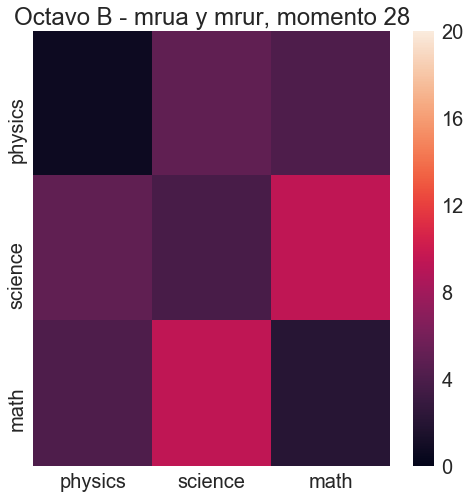

In [183]:
les_df = []
a_label = labels_per_audio[doc]
directory = os.path.join('heatmap',a_label)
if not os.path.exists(directory):
    os.makedirs(directory)
filesnames = []
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i =  doc+'_period_'+str(i)
    a_matrix = super_matrices[label_i]
    for k in range(len(a_matrix)):
        for j in range(len(a_matrix)):
            if k>j:
                a_matrix[k,j] = a_matrix[j,k]
    df = pd.DataFrame(a_matrix)
    df.columns = ['physics','science','math']
    df.index = ['physics','science','math']
    les_df.append(df)
    if i ==0:
        cbar =True
    else:
        cbar = False
    sns.set(font_scale=2.0)
    ax_sn = sns.heatmap(df,vmin=0, vmax=20,cbar=cbar,) 
    ax_sn.set_title('Octavo '+a_label.split('-')[1]+'-'+a_label.split('-')[2]+", momento "+str(i))
    figure = ax_sn.get_figure()  
    figure.savefig(os.path.join(directory,label_i+".png"))
    filesnames.append(os.path.join(directory,label_i+".png"))
    del ax_sn
    del figure
    del df

In [114]:
import imageio
images = []
for filename in filesnames:
    images.append(imageio.imread(filename))

kargs = { 'duration': 0.5 }
imageio.mimsave('heatmap/'+a_label+'.gif', images,**kargs)
print 'heatmap/'+a_label+'.gif'

heatmap/10th-B - mrua y mrur.gif


<img src="heatmap/10th-B - mrua y mrur.gif?controls=true" alt="Flowers in Chania">


## Heatmap all topics

In [179]:
super_topics_colors = ['#64DD17','#6200EA','#FFD600'] #science, #physics, #math

colors_by_topic = {}
for i in range(len(content_topics)):
    colors_by_topic[selected_topics[content_topics[i]]] = super_topics_colors[1]
for i in range(len(science_skills_topics)):
    colors_by_topic[selected_topics[science_skills_topics[i]]] = super_topics_colors[0]
for i in range(len(science_tools_topics)):
    colors_by_topic[selected_topics[science_tools_topics[i]]] = super_topics_colors[2]

In [177]:
for tick_label in ax_sn.axes.get_yticklabels():
    tick_text = tick_label.get_text()
    tick_label.set_color(colors_by_topic[tick_text])

In [151]:
def sort_a_matrix(a_matrix,sorted_index):
    new_matrix = np.zeros((len(sorted_index),len(sorted_index)))
    for i in range(len(sorted_index)):
        for j in range(len(sorted_index)):
            new_matrix[i,j] = a_matrix[sorted_index[i],sorted_index[j]]
    return new_matrix

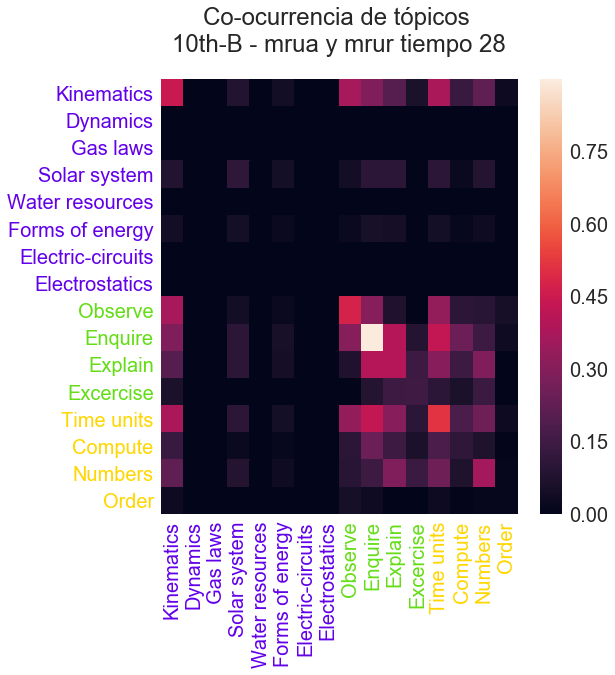

In [194]:
les_df = []
a_label = labels_per_audio[doc]
directory = os.path.join('heatmap',a_label+'_test')
if not os.path.exists(directory):
    os.makedirs(directory)
filesnames = []
sorted_topics = content_topics + science_skills_topics + science_tools_topics
sorted_names_topics = np.array(selected_topics)[sorted_topics]
for i in range(len(labels_by_session[doc].keys())):
    # construir label_i
    label_i =  doc+'_period_'+str(i)
    a_matrix = co_ocurrence_matrices[label_i]
    for k in range(len(a_matrix)):
        for j in range(len(a_matrix)):
            if k>j:
                a_matrix[k,j] = a_matrix[j,k]
    df = pd.DataFrame(sort_a_matrix(a_matrix,sorted_topics))
    df.columns = sorted_names_topics#['physics','science','math']
    df.index =  sorted_names_topics#['physics','science','math']
    # df = 
    les_df.append(df)
    if i ==0:
        cbar =True
    else:
        cbar = False
    sns.set(font_scale=2.0)
    ax_sn = sns.heatmap(df,vmin=0,cbar=cbar,) 
    ax_sn.set_title(u"Co-ocurrencia de tópicos \n"+a_label+" tiempo "+str(i),y=1.05)    
    for tick_label in ax_sn.axes.get_yticklabels():
        tick_text = tick_label.get_text()
        tick_label.set_color(colors_by_topic[tick_text])
    for tick_label in ax_sn.axes.get_xticklabels():
        tick_text = tick_label.get_text()
        tick_label.set_color(colors_by_topic[tick_text])
    figure = ax_sn.get_figure()  
    figure.savefig(os.path.join(directory,label_i+".png"), bbox_inches='tight')
    filesnames.append(os.path.join(directory,label_i+".png"))


In [195]:
images = []
for filename in filesnames:
    images.append(imageio.imread(filename))
kargs = { 'duration': 0.5 }
imageio.mimsave('heatmap_test/'+a_label+'.gif', images,**kargs)
print 'heatmap_test/'+a_label+'.gif'

heatmap_test/10th-B - mrua y mrur.gif


### Get co-occurrence vectors

In [114]:
co_occurrence_vectors_corpus = {}
for key in co_ocurrence_matrices_all_corpus.keys():
    matrix = co_ocurrence_matrices_all_corpus[key]
    co_occurrence_vectors_corpus[key] = ep.co_occurrence_matrix_to_vector(matrix,USE_DIAGONAL)

In [115]:
len(co_occurrence_vectors_corpus)

56

In [116]:
co_occurrence_vectors = {}
for key in co_ocurrence_matrices.keys():
    matrix = co_ocurrence_matrices[key]
    co_occurrence_vectors[key] = ep.co_occurrence_matrix_to_vector(matrix,USE_DIAGONAL)

In [117]:
len(co_occurrence_vectors)

289

In [46]:
co_occurrence_vectors.values()[0].shape

(120L,)

#### Normalize vectors

In [55]:
reload(ep)

<module 'ena.ena_processing' from 'ena\ena_processing.py'>

In [48]:
# normalized to unit vectors
norm_vectors_corpus = ep.norm_vectors(co_occurrence_vectors_corpus)

In [49]:
norm_vectors = ep.norm_vectors(co_occurrence_vectors)

In [52]:
sum_vectors = sum(norm_vectors_corpus.values())
n_sessions_corpus = len(norm_vectors_corpus)
mean_vector = [x/n_sessions_corpus for x in sum_vectors]

In [56]:
norm_vectors_corpus = ep.sub_vectors(norm_vectors_corpus,mean_vector)

In [57]:
norm_vectors = ep.sub_vectors(norm_vectors,mean_vector)

In [58]:
matrix_vectors = np.matrix(norm_vectors_corpus.values())
matrix_vectors.shape

(56L, 120L)

In [114]:
vectors_by_session = {}
for k in labels_by_session.keys():
    aux_list = labels_by_session[k].keys()
    vectors_by_session[k] = np.sum(map(lambda x: norm_vectors[x],aux_list),0)/len(aux_list)

In [46]:
np.array(selected_topics)[content_topics]

array(['Kinematics', 'Dynamics', 'Gas laws', 'Solar system',
       'Water resources', 'Forms of energy', 'Electric-circuits',
       'Electrostatics'], dtype='|S17')

### Get axes to project each session

In [60]:
n_pairs_coocurrence = len(norm_vectors.values()[0])
n_pairs_coocurrence

120

In [61]:
with open(os.path.join(pickle_path,'plane_1.pickle'),'rb') as f:
    axis_X = pickle.load(f)
    axis_Y = pickle.load(f)
    label_x = pickle.load(f)
    label_y = pickle.load(f)
    T_x = pickle.load(f)        
    T_y = pickle.load(f)

### Get projections

In [62]:
x_values = {}
y_values = {}
for k,vector in norm_vectors.items():
    x_values[k] = np.dot(vector,axis_X)
    y_values[k] = np.dot(vector,axis_Y)

In [109]:
session_x = {}
session_y = {}
for k,vector in norm_vectors_corpus.items():
    session_x[k] = np.dot(vector,axis_X)
    session_y[k] = np.dot(vector,axis_Y)

In [117]:
session_x_check = {}
session_y_check = {}
for k,vector in vectors_by_session.items():
    session_x_check[k] = np.dot(vector,axis_X)
    session_y_check[k] = np.dot(vector,axis_Y)

### Get Ideal topics

In [64]:
ideal_topics_vectors = [np.zeros((len(selected_topics),len(selected_topics))) for i in range(len(selected_topics))]
for i in range(len(ideal_topics_vectors)):
    ideal_topics_vectors[i][i,:] = [1 for j in range(len(selected_topics))]
    ideal_topics_vectors[i][:,i] = [1 for j in range(len(selected_topics))]
len(selected_topics)
ideal_topics_vectors = [ep.co_occurrence_matrix_to_vector(x,USE_DIAGONAL) for x in ideal_topics_vectors]

In [65]:
#topics_vectors
x_values_ideal_topics = []
y_values_ideal_topics = []
for vector in ideal_topics_vectors:
    x_values_ideal_topics.append(np.dot(vector,axis_X))
    y_values_ideal_topics.append(np.dot(vector,axis_Y))

### Save data

In [121]:
with open(os.path.join(pickle_path,'trajectories_'+str(PERIOD_LENGTH)+'_minutes_'+str(OVERALP_LENGTH)+'overlap_complete_sample.pickle'),'wb') as f:
    pickle.dump(x_values,f)
    pickle.dump(y_values,f)
    pickle.dump(labels,f)
    pickle.dump(labels_by_session,f)
    pickle.dump(session_x,f)
    pickle.dump(session_y,f)
    pickle.dump(session_x_check,f)
    pickle.dump(session_y_check,f)

## Plot all pieces

In [86]:
reload(ev)

<module 'ena.ena_viz' from 'ena\ena_viz.py'>

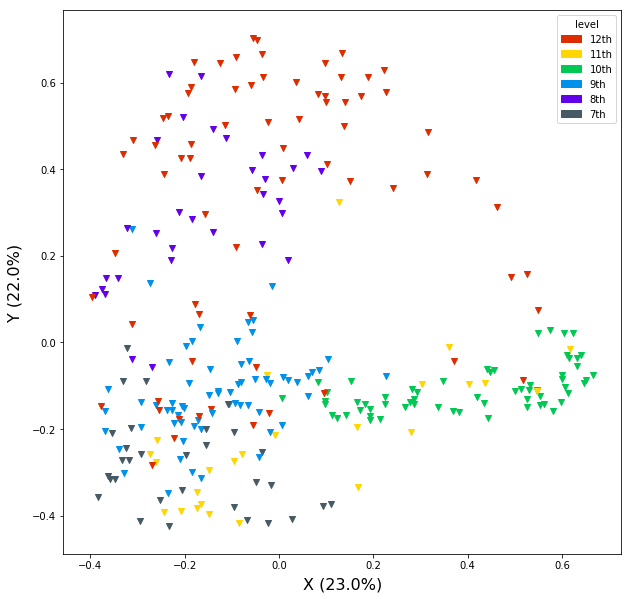

In [87]:
ev.scatter_plot_by_grade(x_values,y_values,label_x,label_y,labels,'upper right')

## Plot one trajectory

In [79]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['matrix', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [44]:
counter = 0
for doc in labels_by_session.keys():
    # draw polygons
    fig, ax = plt.subplots()
    scatt = plt.scatter(T_x,T_y,marker='*')
    tooltips_nodes = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
    mpld3.plugins.connect(plt.gcf(), tooltips_nodes)
    
    polygon_content = Polygon(zip(np.array(T_x)[content_topics],np.array(T_y)[content_topics]),True)
    polygon_skills = Polygon(zip(np.array(T_x)[science_skills_topics],np.array(T_y)[science_skills_topics]),True)
    polygon_arithmetic = Polygon(zip(np.array(T_x)[science_tools_topics],np.array(T_y)[science_tools_topics]),True)
    
    patches = [polygon_content,polygon_skills,polygon_arithmetic]
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.06)
    colors = [ 0.82012597,81.58657731,98.9247411 ]
    p.set_array(np.array(colors))
    ax.add_collection(p)
    for t in content_topics:
        s = selected_topics[t]
        if selected_topics[t].startswith('Water'):
            s = 'Water res'
        ax.annotate(s,xy=(T_x[t],T_y[t]),xytext=(T_x[t]-0.05,T_y[t]+0.1))
    
    # draw xvalues yvalues using labels_array_matrices
    x_by_session = []
    y_by_session = []
    a_tooltips = []
    a_label = ""
    
    for i in range(len(labels_by_session[doc].keys())):
        # construir label_i
        label_i = doc+'_period_'+str(i)
        #value_i = labels_array_matrices.index(label_i)
        a_label = labels[label_i]
        x_by_session.append(x_values[label_i])
        y_by_session.append(y_values[label_i])
        if i == 0:
            a_color = 'r'
        elif a_label.startswith('end'):
            a_color = 'y'
        else:
            a_color = 'g'
        scatt_ = plt.scatter(x_values[label_i],y_values[label_i],c=a_color)
        a_tooltips.append(mpld3.plugins.PointLabelTooltip(scatt_, labels=[a_label]))

    plt.plot(x_by_session,y_by_session,'g')
    
    for j in range(len(a_tooltips)):
        mpld3.plugins.connect(plt.gcf(), a_tooltips[j])

    # original session
    plt.scatter([session_x[doc]],[session_y[doc]],c='purple',marker='s')
    plt.scatter([session_x_check[doc]],[session_y_check[doc]],c='orange',marker='s')
    

    plt.title(a_label[4:])

    open(os.path.join('output','html2',str(PERIOD_LENGTH)+'m','trajectory_session_'+str(doc)+'_'+a_label[4:]+'_10_minutes.html'), 'w').write(fig_to_d3(fig))
    #fig.savefig(os.path.join('output','svg',str(PERIOD_LENGTH)+'m','trajectory_session_'+str(doc)+'_'+a_label[4:]+'_10_minutes.svg'))
    #mpld3.fig_to_html(fig,'trajectory_seesion_'+str(i)+'.html')

NameError: name 'plt' is not defined

In [609]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 6)

Populating the interactive namespace from numpy and matplotlib


C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['title', 'grid']
`%matplotlib` prevents importing * from pylab and numpy



In [ ]:
10th-B - mrua y mrur

In [45]:
labels[doc]

KeyError: '1493128754967'

In [129]:
co_ocurrence_vectors['1493128754967']

NameError: name 'co_ocurrence_vectors' is not defined

In [299]:
labels_by_session[doc]

{'1496173972733_period_0': u'period_0_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_1': u'period_1_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_10': u'period_10_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_11': u'period_11_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_12': u'period_12_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_13': u'period_13_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_14': u'period_14_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_15': u'period_15_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_16': u'period_16_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_17': u'period_17_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_18': u'period_18_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_19': u'period_19_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_2': u'period_2_8th-B - energ\xeda el\xe9ctrica ',
 '1496173972733_period_20': u'p

In [147]:
un_label = '1493128754967_period_3'
df = pd.DataFrame(co_ocurrence_matrices[un_label])
df.columns = selected_topics
df.index = selected_topics
df.to_csv('co_occurrence_matrix_'+un_label+'.csv')
df

,Kinematics,Observe,Time units,Gas laws,Electric-circuits,Explain,Solar system,Electrostatics,Compute,Excercise,Forms of energy,Numbers,Enquire,Water resources,Order,Dynamics
Kinematics,3.187700,2.138214,2.702745,0.0,0.0,0.824670,0.736001,0.223620,1.121253,0.585201,0.482411,1.941274,1.703398,0.0,0.111999,0.203510
Observe,2.138214,2.907200,1.940966,0.0,0.0,0.287376,0.381653,0.106117,0.787882,0.271983,0.312326,0.806488,1.302462,0.0,0.204516,0.147148
Time units,2.702745,1.940966,3.490600,0.0,0.0,1.268753,0.655110,0.281008,1.113898,0.578070,0.386709,2.323222,2.243985,0.0,0.113492,0.119879
Gas laws,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Electric-circuits,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Explain,0.824670,0.287376,1.268753,0.0,0.0,1.827700,0.396935,0.165519,0.616420,0.674245,0.257159,1.784436,1.518775,0.0,0.000000,0.144936
Solar system,0.736001,0.381653,0.655110,0.0,0.0,0.396935,1.020000,0.000000,0.285601,0.060150,0.402909,0.524159,0.590908,0.0,0.000000,0.000000
Electrostatics,0.223620,0.106117,0.281008,0.0,0.0,0.165519,0.000000,0.550500,0.095692,0.000000,0.026181,1.102377,0.375573,0.0,0.000000,0.071493
Compute,1.121253,0.787882,1.113898,0.0,0.0,0.616420,0.285601,0.095692,0.908000,0.585315,0.268804,0.625785,1.184032,0.0,0.022983,0.209078
Excercise,0.585201,0.271983,0.578070,0.0,0.0,0.674245,0.060150,0.000000,0.585315,1.053500,0.237930,0.695692,0.385931,0.0,0.000000,0.350197


In [148]:
df = pd.DataFrame(co_ocurrence_matrices_all_corpus['1493128754967'])
df.columns = selected_topics
df.index = selected_topics
df.to_csv('co_occurrence_matrix_1493128754967.csv')
df

,Kinematics,Observe,Time units,Gas laws,Electric-circuits,Explain,Solar system,Electrostatics,Compute,Excercise,Forms of energy,Numbers,Enquire,Water resources,Order,Dynamics
Kinematics,14.083200,6.322482,11.645365,0.174691,0.0,3.173345,1.682414,2.118574,5.204041,2.195762,2.439078,8.495665,4.968614,0.079300,4.357474,3.671093
Observe,6.322482,8.629500,7.081923,0.302429,0.0,2.001614,0.803278,1.304071,2.124000,0.478711,0.945017,3.293461,3.064267,0.000000,2.146680,1.605647
Time units,11.645365,7.081923,14.463800,0.258679,0.0,4.034899,1.257000,1.812037,4.599431,1.806929,1.902269,7.768874,5.182581,0.069902,4.215290,3.050544
Gas laws,0.174691,0.302429,0.258679,0.087500,0.0,0.045176,0.000000,0.000000,0.053979,0.032485,0.044272,0.027368,0.000000,0.000000,0.020706,0.120897
Electric-circuits,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Explain,3.173345,2.001614,4.034899,0.045176,0.0,3.940400,0.608173,0.885916,2.154513,1.611977,0.880040,4.045277,3.273775,0.000000,1.298042,1.261106
Solar system,1.682414,0.803278,1.257000,0.000000,0.0,0.608173,2.525000,0.246042,0.919223,0.421951,1.062731,1.460559,1.149803,0.000000,0.000000,0.082271
Electrostatics,2.118574,1.304071,1.812037,0.000000,0.0,0.885916,0.246042,3.084500,1.236717,0.601443,0.400402,3.141765,1.005471,0.000000,0.699165,1.134989
Compute,5.204041,2.124000,4.599431,0.053979,0.0,2.154513,0.919223,1.236717,5.761800,2.247224,1.435950,4.605164,3.307715,0.099947,2.933056,1.662393
Excercise,2.195762,0.478711,1.806929,0.032485,0.0,1.611977,0.421951,0.601443,2.247224,3.130500,1.009148,2.413864,1.147283,0.063357,1.314554,1.116796


In [85]:
mpld3.fig_to_html?

In [ ]:
GET THE CORRECT LABELS FOR FILTERED SESSIONS
energy_CHECKTHIS = [20,14,15,54,26,42,41,46]
kinematics = [27,38,44,2,32,12,52]
electrodinamics = []
circuits = [31,30,22,0,48]
electrostatic = [45,3,25,17]
optics = [29,8,13,4,18,10,23,6,29]
sound = [51,36,33]
fluids = [28,53,43,50]

In [ ]:
## just init cinematica

In [ ]:
## just end cinematica

In [ ]:
## graph comparison

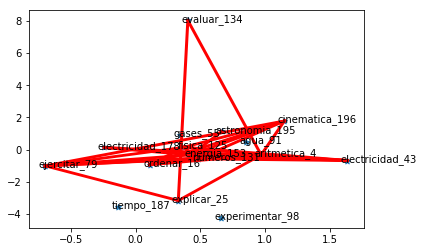

In [315]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
for i in range(n_topics):
    plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
    for j in range(n_topics):
        if i>j:
            if co_occurrence_matrix[i,j] > 250:
                plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='r',linewidth=np.log(co_occurrence_matrix[i,j])/2)
scatt_cm = plt.scatter(CM_sesion_x,CM_sesion_y,marker='o')
scatt_session = plt.scatter(x_values,y_values,marker='v')
#scatt = plt.scatter(T_x,T_y,marker='*',c='b')

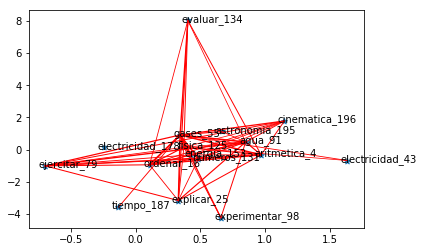

In [316]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
for i in range(n_topics):
    plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
    for j in range(n_topics):
        if i>j:
            if co_ocurrence_matrices[27][i,j] > 4:
                plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='r',linewidth=np.log(co_ocurrence_matrices[27][i,j])/2)

#scatt = plt.scatter(T_x,T_y,marker='*',c='b')

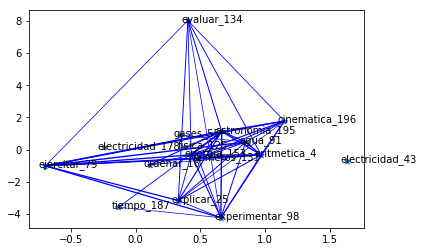

In [317]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
for i in range(n_topics):
    plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
    for j in range(n_topics):
        if i>j:
            if co_ocurrence_matrices[46][i,j] > 4:
                plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='b',linewidth=np.log(co_ocurrence_matrices[46][i,j])/2)

#scatt = plt.scatter(T_x,T_y,marker='*',c='b')

In [318]:
diff_matrix = co_ocurrence_matrices[46] - co_ocurrence_matrices[27]
pd.DataFrame(diff_matrix).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.911970,2.737317,0.204001,-19.721827,-1.342183,-1.079709,8.910126,-1.040295,-0.609295,2.906697,3.009790,-0.918839,-1.505255,-3.161621,-5.736219,-5.357670
std,4.414147,5.848099,2.172467,26.200110,1.034071,4.436474,10.210418,1.796604,7.139505,6.328366,6.115800,6.017742,4.961075,5.492968,8.654714,6.531994
min,-11.198753,-11.544080,-5.137447,-113.676000,-3.293912,-12.821427,-7.409398,-5.236463,-20.029762,-9.228281,-8.282042,-19.136146,-16.180056,-16.545901,-32.278894,-23.594317
25%,-0.431411,-0.344215,-0.541153,-19.359550,-2.004321,-3.358755,3.830693,-1.776948,-1.918260,-0.588632,-0.880892,-1.832095,-2.309887,-3.581277,-6.344618,-5.517096
50%,1.617591,2.189089,0.376863,-12.182753,-1.027723,-0.923553,6.746860,-0.669633,-0.182301,2.658804,2.337485,-0.644507,-1.048282,-1.781500,-3.387946,-3.040088
75%,2.861723,5.880618,1.082742,-8.063881,-0.765450,1.154174,12.561995,-0.058834,2.747988,6.098625,5.720307,1.788478,1.137620,-0.653786,-1.735177,-1.795318
max,9.207846,12.882174,4.500117,-3.250265,0.367299,7.100348,37.911500,1.822420,12.455269,17.029566,19.651912,9.306402,5.648184,6.393372,5.089899,0.605103


In [82]:
np.log(1)

0.0

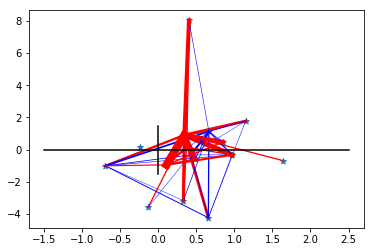

In [319]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
plot_label = True
for i in range(n_topics):
    for j in range(n_topics):
        if i>j:
            if np.abs(diff_matrix[i,j]) > 4:
                if plot_label:
                    #plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
                    plot_label = False
                if diff_matrix[i,j] > 0:
                    plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='b',linewidth=diff_matrix[i,j]/10)
                else:
                    plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='r',linewidth=np.abs(diff_matrix[i,j])/4)
    plot_label = True
plt.plot([0,0],[1.5,-1.5],c='black')
plt.plot([2.5,-1.5],[0,0],c='black')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
mpld3.plugins.connect(plt.gcf(), tooltips)